# Simple Linear Regression

Simple Linear Regression is a fundamental yet very widely used and certainly a powerful ML technique.
 - In this setting we have only 1 input feature and thus it has the term "Simple" in it
 - The term "Linear" denotes that we try to fit a straight line through the data points in our dataset
 - The goal is to predict the target based on the input feature that it has not seen
 
 When I say "fit a straight line", it means that I try to find a unique straight line that goes through a majority of the data-points. This is when I can say that the model has fit the data well.

A straight line is of the form: __*y = mX + c*__ 
Here (m, c) are called the model parameters or coefficients.
In mathematical sense, m is called "*the slope*" and c is called "*the intercept*"

When we train a model on the training data, the model estimates the values of m and c. The values of m and c that we obtain after training the model are called the coefficient estimates.
Note that the paraemters obtained after training are not representative of the true coefficent parameters and hence are called estimates

Equation of Simple Linear Regression:

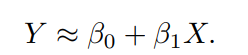

*The beta's are one way of representing the model coefficients*

In [ ]:
# necessary imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### The dataset here has salary as the continuous target mapped against the input feature Years of experience.

In [ ]:
# read the dataset and display the head
df = pd.read_csv("Salary_Data.csv")
df.head()

In [ ]:
df.shape

In [ ]:
df["YearsExperience"].unique()

In [ ]:
sum(df["Salary"].isna())

The above steps taken represent Data pre-processing steps. However the dataset is pretty clean and there was not much we had to do. In future we will deal with more complex datasets that might need a lot of preprocessing

During training we provide the **features** as a _nxp matrix_ in which each column represents a particular feature and each row represents an instance within the dataset. (n is the number of datapoints and p is the number of features)

In [ ]:
# Split the data into the feature matrix X and the target array y
X = df.iloc[:,0]
X = X.values.reshape((-1,1))

y = df.iloc[:,1]

In [ ]:
# Randomly split data into training set and testing set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Parameters:
# - X: The feature data (independent variables).
# - y: The target data (dependent variable).
# - test_size: The proportion of the dataset to include in the testing set (e.g., 0.2 for 20% of the data).
# - random_state: Optional. If you set a random state, it ensures reproducibility. The same random split will occur if you use the same random_state value in the future.

# You now have X_train (features for training), X_test (features for testing), y_train (target for training), and y_test (target for testing).

In [ ]:
# Instantiating the model and training it

from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train,y_train)

y_pred = model.predict(X_test)   #predictions of the model on new unseen data

In [ ]:
# Estimated coefficient of model(m)
model.coef_

In [ ]:
# Esimated coefficient of model (c)
model.intercept_

In [ ]:
# In this set of code we evaluate the prediction of our model. I will explain what the terms mean in future notebooks
# For now remember that Mean absolute error should be as low as possible

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

In [ ]:
# Plot of the linear regression fit(red) and the actual datapoints(blue)

plt.scatter(X,y)
plt.plot(X_test,y_pred, color = "red", label = "Linear regression fit")
plt.legend()
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

You might notice something about the above plot. Yes the linear regression fit misses/ doesn't touch some of the data points.
Now this will be the topic of discussion for us

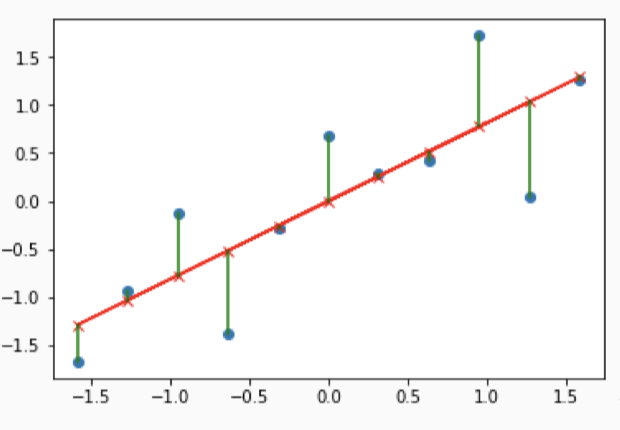

If you see the above image, we see that there are lines dropped(green) from the data point onto the linear regression fit. The magnitude of the green line is called the **residual**. It represents the differnce between the actual data-point and the prediction made by the model for that point. In other words it represents the *error*term.


Now, we can cleary see that the error terms' magnitude is greater for some points than the other. So the total error in prediction is given by the sum of individual errors. This term is technically  called *RSS(Residual Sum of Squares)*

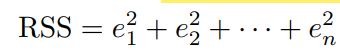

The goal of training phase is to find the model parameters that will **minimize** the RSS term. 
The mimum value of parameters is can be found using *Gradient-Descent Algorithm* which is a powerful algorithm whose purpose is to find the minimum value of a function.

We will discuss Gradient Descent in future notebooks

The approach we have taken to solve the Simple Linear Regression case is called Ordinary *Least Squares*, since the straight line fit is obtained by minimizing the term Sum of *Least Squares*

To evaluate the performance of a Linear Regression model, we can use several common regression evaluation metrics. 
Here are some of the most commonly used metrics:

1. **Mean Absolute Error (MAE):**
   - The MAE measures the average absolute difference between the predicted values and the actual values.
   - It is less sensitive to outliers than the mean squared error.

2. **Mean Squared Error (MSE):**
   - The MSE measures the average squared difference between the predicted values and the actual values.
   - It penalizes larger errors more than smaller ones.

3. **Root Mean Squared Error (RMSE):**
   - The RMSE is the square root of the MSE, and it provides a measure of the average error in the same units as the target variable.


That is it about Simple Linear Regression. Now we move onto an extension of the Simple Linear Regression, called **Multiple Linear Regression**

## Multiple Linear Regression

The workflow is the same as Simple Linear Regression. We train the model on training data to esimate the model parameters in such  a way that the error in prediction is minimized. Then we evaluate the performance of our model with performance metrics like MSE, RMSE


Unlike Simple Linear Regression, Multiple Linear Regression has more than one feature that are given to the model as the input. Hence the name "Multiple". 
This is the fundamental difference between the two techniques.

Like before we try to implement this technique for better understanding.

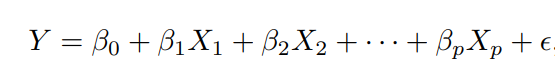

The value at the right end of the above picture is called "Epsilon" which denotes Irreducible error. Irreducible error represents the error introduced by factors that are not under our direct influence.

In [20]:
# necessary imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
# read the dataset
df = pd.read_csv("Student_Performance.csv")

**This dataset has multiple features that are used to assess a student's performance to evaluate performance index(target) that has continuous values in the range 0 to 100**

In [22]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [23]:
(df != " ").all().all()

True

In [24]:
df["Sample Question Papers Practiced"].unique()

array([1, 2, 5, 6, 0, 8, 3, 4, 9, 7], dtype=int64)

In [25]:
# Convert the Qualitative variables into qualitative variables
df_encoded = pd.get_dummies(df, columns=['Extracurricular Activities'])

*The importance of the above step will be explained in future releases*

In [26]:
df_encoded.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities_No,Extracurricular Activities_Yes
0,7,99,9,1,91.0,0,1
1,4,82,4,2,65.0,1,0
2,8,51,7,2,45.0,0,1
3,5,52,5,2,36.0,0,1
4,7,75,8,5,66.0,1,0


In [27]:
df_encoded = df_encoded[[x for x in df_encoded.columns if x!= "Performance Index"] + ["Performance Index"]]

The above set of steps were part of data-preprocessing and since this is a simple dataset there was not much to pre-process. But rememebr that data pre-processing is a crucial step that can **make or break** your model!!!

In [29]:
df_encoded.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Extracurricular Activities_No,Extracurricular Activities_Yes,Performance Index
0,7,99,9,1,0,1,91.0
1,4,82,4,2,1,0,65.0
2,8,51,7,2,0,1,45.0
3,5,52,5,2,0,1,36.0
4,7,75,8,5,1,0,66.0


In [30]:
X = df_encoded.iloc[:,:-1]
y = df_encoded.iloc[:,-1]

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Parameters:
# - X: The feature data (independent variables).
# - y: The target data (dependent variable).
# - test_size: The proportion of the dataset to include in the testing set (e.g., 0.2 for 20% of the data).
# - random_state: Optional. If you set a random state, it ensures reproducibility. The same random split will occur if you use the same random_state value in the future.

# You now have X_train (features for training), X_test (features for testing), y_train (target for training), and y_test (target for testing).

In [37]:
# Building the model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [38]:
# making prediction
y_pred = model.predict(X_test)

In [40]:
# estimated parameters of the model, note that in case of Simple Linear Regression, 
# there was only a single element in this variable
model.coef_

array([ 2.85895223,  1.01551979,  0.47967676,  0.19039416, -0.29085643,
        0.29085643])

In [42]:
# The intercept term, which is also determined during training
model.intercept_

-33.54568738005488

In [41]:
# assess the performance of the linear model

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared (R2) Score: {r2}")


Mean Absolute Error: 1.609043756404523
Mean Squared Error: 4.066563824092685
Root Mean Squared Error: 2.0165722957763466
R-squared (R2) Score: 0.9890110607021136


There is another flavor to Linear Regression called the *Polynomial Regresion* which I will discuss in this notebook in the future releases.